In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
Dataset = pd.read_csv("../NGS-DataAnalysis/Results/HARP-NB-Round4-CDR3.csv")
Dataset1 = pd.read_csv("../NGS-DataAnalysis/Results/HARP-NB-Round2-CDR3.csv")

Dataset['Rand'] = Dataset['CDR3'].str.slice(1)
Dataset1['Rand'] = Dataset1['CDR3'].str.slice(1)

# Function to remove the character before the last one from each sequence
def remove_char_before_last(seq):
    if len(seq) > 1:
        return seq[:-2] + seq[-1]  # Keep everything except the second-to-last character and append the last character
    else:
        return seq  

# Apply the function to remove the character before the last one from each CDR3 sequence (to get the random region)
Dataset['Only Random All'] = Dataset['Rand'].apply(remove_char_before_last)
Dataset1['Only Random All'] = Dataset1['Rand'].apply(remove_char_before_last)

###CDR3-RAND
Dataset ["Random Region Middle"] = Dataset ["Rand"].astype(str).str[:-2]
Dataset.loc[:, 'CDR3_length-rmid'] = Dataset['Random Region Middle'].apply(lambda x: len(x) if isinstance(x, str) else 0)

Dataset1 ["Random Region Middle"] = Dataset1 ["Rand"].astype(str).str[:-2]
Dataset1.loc[:, 'CDR3_length-rmid'] = Dataset1['Random Region Middle'].apply(lambda x: len(x) if isinstance(x, str) else 0)


Dataset

,CDR3,Number of Reads,Rand,Only Random All,Random Region Middle,CDR3_length-rmid
0,AYEIDWPYFG,2006,YEIDWPYFG,YEIDWPYG,YEIDWPY,7
1,VDRGDTGPYP,1961,DRGDTGPYP,DRGDTGPP,DRGDTGP,7
2,AYTYVENQGYYYFA,1899,YTYVENQGYYYFA,YTYVENQGYYYA,YTYVENQGYYY,11
3,AEYTEVDFGSNYWSYGHF,1590,EYTEVDFGSNYWSYGHF,EYTEVDFGSNYWSYGF,EYTEVDFGSNYWSYG,15
4,ADVAIYYWLL,1134,DVAIYYWLL,DVAIYYWL,DVAIYYW,7
...,...,...,...,...,...,...
1273,AYWLGDVLYQ,1,YWLGDVLYQ,YWLGDVLQ,YWLGDVL,7
1274,AYYDTSSYLVYGHI,1,YYDTSSYLVYGHI,YYDTSSYLVYGI,YYDTSSYLVYG,11
1275,AYYHGPDRLV,1,YYHGPDRLV,YYHGPDRV,YYHGPDR,7
1276,AYYPHDHTVGFEHD,1,YYPHDHTVGFEHD,YYPHDHTVGFED,YYPHDHTVGFE,11


In [3]:
 #Define Dictionaries and parameters
Amino = {
     "A": "Ala",
     "D": "Asp",
     "E": "Glu",
     "F": "Phe",
     "G": "Gly",
     "H": "His",
     "I": "Ile",
     "K": "Lys",
     "L": "Leu",
     "N": "Asn",
     "P": "Pro",
     "Q": "Gln",
     "R": "Arg",
     "S": "Ser",
     "T": "Thr",
     "V": "Val",
     "W": "Trp",
     "Y": "Tyr",    
 }

Freq_Naive = {
    'Amino Acid': ['A', 'C', 'D', 'E',  'F',  'G',  'H', 'I',  'K', 'L',  'M', 'N',   'P', 'Q',  'R',  'S',  'T', 'V',  'W', 'Y'],
    'Frequency': [0.06, 0, 0.09, 0.03, 0.03, 0.12, 0.02, 0.03, 0.02, 0.05, 0, 0.04, 0.04, 0.02, 0.06, 0.1, 0.07, 0.05, 0.03, 0.14]
}

# Create DataFrame
CDR3_freq_R1 = pd.DataFrame(Freq_Naive)
CDR3_freq_R1

,Amino Acid,Frequency
0,A,0.06
1,C,0.00
2,D,0.09
3,E,0.03
4,F,0.03
5,G,0.12
6,H,0.02
7,I,0.03
8,K,0.02
9,L,0.05


In [4]:
## making naive for positions
# Define the values to be used as the index and the first column 
index_values = ['A', 'D', 'E',  'F',   'G',  'H', 'I',   'K', 'L',   'N',  'P',  'Q', 'R',  'S',  'T',  'V', 'W',   'Y']
values =      [0.06, 0.09, 0.03, 0.03, 0.12, 0.02, 0.03, 0.02, 0.05, 0.04, 0.04, 0.02, 0.06, 0.10, 0.07, 0.05, 0.03, 0.14]

# Create the initial DataFrame with index and the first column
Naive11 = pd.DataFrame({'p1': values}, index=index_values)

# Repeat the p2 values across columns p3 to p11
for i in range(2, 12):
    Naive11[f'p{i}'] = Naive11['p1']
    
    # Create the initial DataFrame with index and the first column
Naive7 = pd.DataFrame({'p1': values}, index=index_values)

# Repeat the p2 values across columns p3 to p11
for i in range(2, 8):
    Naive7[f'p{i}'] = Naive7['p1']

    
    
    # Create the initial DataFrame with index and the first column
Naive15 = pd.DataFrame({'p1': values}, index=index_values)

# Repeat the p2 values across columns p3 to p11
for i in range(2, 16):
    Naive15[f'p{i}'] = Naive11['p1']

# Display the DataFrame
Naive15

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
A,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
D,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
E,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
F,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
G,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
H,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
I,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
K,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
L,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
N,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [5]:
# Create a list to hold all sequences repeated by their number of reads
weighted_sequences = ''.join([sequence * reads for sequence, reads in zip(Dataset1['Random Region Middle'], Dataset1['Number of Reads'])])

# Use Counter to count occurrences of each amino acid
amino_acid_count = Counter(weighted_sequences)

# Calculate total number of amino acids
total_amino_acids = sum(amino_acid_count.values())

# Calculate the frequency of each amino acid
amino_acid_freq = {aa: count / total_amino_acids for aa, count in amino_acid_count.items()}

# Convert the result to a DataFrame for easy viewing
df_amino_acid_freq = pd.DataFrame(list(amino_acid_freq.items()), columns=['Amino Acid', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_amino_acid_freq = df_amino_acid_freq.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame
CDR3_freq_R2 = df_amino_acid_freq
CDR3_freq_R2


# Create a list to hold all sequences repeated by their number of reads
weighted_sequences = ''.join([sequence * reads for sequence, reads in zip(Dataset['Random Region Middle'], Dataset['Number of Reads'])])

# Use Counter to count occurrences of each amino acid
amino_acid_count = Counter(weighted_sequences)

# Calculate total number of amino acids
total_amino_acids = sum(amino_acid_count.values())

# Calculate the frequency of each amino acid
amino_acid_freq = {aa: count / total_amino_acids for aa, count in amino_acid_count.items()}

# Convert the result to a DataFrame for easy viewing
df_amino_acid_freq = pd.DataFrame(list(amino_acid_freq.items()), columns=['Amino Acid', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_amino_acid_freq = df_amino_acid_freq.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame
CDR3_freq_R4 = df_amino_acid_freq
CDR3_freq_R4

,Amino Acid,Frequency
0,Y,0.205542
3,D,0.111737
7,G,0.093703
14,A,0.068988
8,T,0.067868
9,V,0.063034
13,S,0.060827
1,E,0.050369
15,L,0.042106
5,P,0.041670


In [6]:
# Enrichment

def Enrichment (df_naive , df_sorted, outfile):
    df1 = df_naive
    df2 = df_sorted
    # Merge dataframes with left join
    merged_df = pd.merge(df1, df2, on='Amino Acid', how='outer')
    # Replace NaN values with 1 in the 'size_x' column
    merged_df['Frequency_x'] = merged_df['Frequency_x'].fillna(1)

    # Replace NaN values with 1 in the 'size_x' column
    merged_df['Frequency_y'] = merged_df['Frequency_y'].fillna(0)
    #rename
    merged_df.rename(columns = {'Frequency_x':'Naive' , 'Frequency_y':'Sorted'}, inplace = True)
    #enrichment ratio
    merged_df ["Enrichment Ratio"] = merged_df ["Sorted"] / merged_df ["Naive"]

    
    #save to file
    merged_df.sort_values(by= "Enrichment Ratio", ascending= False, inplace=True)
    outdf = merged_df
    outdf.to_csv(outfile, index=True)
    print("NGS Enrichment Analysis done sucsesfully.")
    return outdf
    
    
CDR3Enrichment = Enrichment (CDR3_freq_R1, CDR3_freq_R4,'CDR3-Aminoacides-Enrichment.csv')
CDR3Enrichment

NGS Enrichment Analysis done sucsesfully.


,Amino Acid,Naive,Sorted,Enrichment Ratio
10,M,0.00,0.001084,inf
1,C,0.00,0.001126,inf
3,E,0.03,0.050369,1.678967
19,Y,0.14,0.205542,1.468155
18,W,0.03,0.039193,1.306442
17,V,0.05,0.063034,1.260682
2,D,0.09,0.111737,1.241518
4,F,0.03,0.034993,1.166419
0,A,0.06,0.068988,1.149805
7,I,0.03,0.031780,1.059326


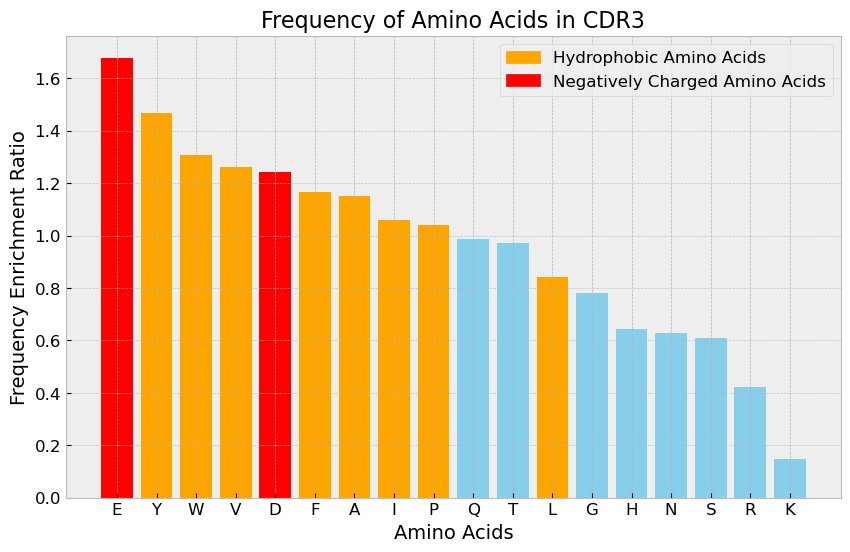

In [7]:

# Define hydrophobic and negatively charged amino acids
hydrophobic = ['F', 'L', 'A', 'V', 'I', 'W', 'Y', 'M', 'P']
negatively_charged = ['D', 'E']

CDR3Enrichment = CDR3Enrichment[~CDR3Enrichment['Amino Acid'].isin(['M', 'C'])]

# Assign colors: hydrophobic (orange), negatively charged (red), others remain default (skyblue)
colors = [
    'orange' if aa in hydrophobic else 'red' if aa in negatively_charged else 'skyblue' 
    for aa in CDR3Enrichment['Amino Acid']
]

# Plotting the frequency of amino acids with specific colors for hydrophobic and negatively charged amino acids
plt.figure(figsize=(10, 6))
plt.bar(CDR3Enrichment['Amino Acid'], CDR3Enrichment['Enrichment Ratio'], color=colors)

# Set title and labels
plt.title('Frequency of Amino Acids in CDR3', fontsize=16)
plt.xlabel('Amino Acids', fontsize=14)
plt.ylabel('Frequency Enrichment Ratio', fontsize=14)

# Improve the aesthetics of the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

import matplotlib.patches as mpatches
# Create custom legend patches
hydrophobic_patch = mpatches.Patch(color='orange', label='Hydrophobic Amino Acids')
negatively_charged_patch = mpatches.Patch(color='red', label='Negatively Charged Amino Acids')

# Add legend to the plot
plt.legend(handles=[hydrophobic_patch, negatively_charged_patch], fontsize=12)


# Save the figure in publication-quality resolution (300 dpi)
plt.savefig('amino_acid_frequency_plot_hydrophobic_negative.png', dpi=300)

# Display the plot
plt.show()



In [8]:
weighted_repeats_CDR3 = Dataset.groupby('CDR3_length-rmid')['Number of Reads'].sum().reset_index()
weighted_repeats_CDR3.to_csv("R4-CDR3-Length.csv")
weighted_repeats_CDR3

,CDR3_length-rmid,Number of Reads
0,0,19
1,1,1
2,2,22
3,3,32
4,4,43
5,5,9
6,6,11
7,7,10048
8,8,32
9,9,358


In [9]:
R4_length_7 = Dataset[Dataset['CDR3_length-rmid'] == 7]
R4_length_11 = Dataset[Dataset['CDR3_length-rmid'] == 11]
R4_length_15 = Dataset[Dataset['CDR3_length-rmid'] == 15]

In [10]:
###For cdr3 length 7

# Create a list to hold all sequences repeated by their number of reads
weighted_sequences = ''.join([sequence * reads for sequence, reads in zip(R4_length_7['Random Region Middle'], R4_length_7['Number of Reads'])])

# Use Counter to count occurrences of each amino acid
amino_acid_count = Counter(weighted_sequences)

# Calculate total number of amino acids
total_amino_acids = sum(amino_acid_count.values())

# Calculate the frequency of each amino acid
amino_acid_freq = {aa: count / total_amino_acids for aa, count in amino_acid_count.items()}

# Convert the result to a DataFrame for easy viewing
df_amino_acid_freq = pd.DataFrame(list(amino_acid_freq.items()), columns=['Amino Acid', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_amino_acid_freq = df_amino_acid_freq.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame
Len7_CDR3_freq_R4 = df_amino_acid_freq
Len7_CDR3_freq_R4


#### For CDR3 length 11

# Create a list to hold all sequences repeated by their number of reads
weighted_sequences = ''.join([sequence * reads for sequence, reads in zip(R4_length_11['Random Region Middle'], R4_length_11['Number of Reads'])])

# Use Counter to count occurrences of each amino acid
amino_acid_count = Counter(weighted_sequences)

# Calculate total number of amino acids
total_amino_acids = sum(amino_acid_count.values())

# Calculate the frequency of each amino acid
amino_acid_freq = {aa: count / total_amino_acids for aa, count in amino_acid_count.items()}

# Convert the result to a DataFrame for easy viewing
df_amino_acid_freq = pd.DataFrame(list(amino_acid_freq.items()), columns=['Amino Acid', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_amino_acid_freq = df_amino_acid_freq.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame
Len11_CDR3_freq_R4 = df_amino_acid_freq
Len11_CDR3_freq_R4


### for CDR3 Lenth 15

# Create a list to hold all sequences repeated by their number of reads
weighted_sequences = ''.join([sequence * reads for sequence, reads in zip(R4_length_15['Random Region Middle'], R4_length_15['Number of Reads'])])

# Use Counter to count occurrences of each amino acid
amino_acid_count = Counter(weighted_sequences)

# Calculate total number of amino acids
total_amino_acids = sum(amino_acid_count.values())

# Calculate the frequency of each amino acid
amino_acid_freq = {aa: count / total_amino_acids for aa, count in amino_acid_count.items()}

# Convert the result to a DataFrame for easy viewing
df_amino_acid_freq = pd.DataFrame(list(amino_acid_freq.items()), columns=['Amino Acid', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_amino_acid_freq = df_amino_acid_freq.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame
Len15_CDR3_freq_R4 = df_amino_acid_freq
Len15_CDR3_freq_R4

,Amino Acid,Frequency
1,Y,0.190053
4,D,0.113786
6,G,0.091528
7,S,0.086081
2,T,0.071727
3,V,0.069177
10,A,0.067948
11,L,0.063863
0,E,0.053421
5,F,0.050337


In [11]:
##save to dataframe
Len7_CDR3_freq_R4.to_csv("R4_Len_7_cdr3_freq.csv")
Len11_CDR3_freq_R4.to_csv("R4_Len_11_cdr3_freq.csv")
Len15_CDR3_freq_R4.to_csv("R4_Len_15_cdr3_freq.csv")

In [12]:

def create_heatmap_df(input_df, length: int) :
    df_copy = input_df.copy()
    
    # Extract substrings from the 'Rand Region' column based on the provided length
    for i in range(1, length + 1):
        df_copy[f"p{i}"] = df_copy["Random Region Middle"].astype(str).str[i-1]
    
    return df_copy


# Apply the function with length 11
R4_length_7p = create_heatmap_df(R4_length_7, 7)
R4_length_11p = create_heatmap_df(R4_length_11, 11)
R4_length_15p = create_heatmap_df(R4_length_15, 15)
R4_length_11p

,CDR3,Number of Reads,Rand,Only Random All,Random Region Middle,CDR3_length-rmid,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
2,AYTYVENQGYYYFA,1899,YTYVENQGYYYFA,YTYVENQGYYYA,YTYVENQGYYY,11,Y,T,Y,V,E,N,Q,G,Y,Y,Y
5,VFYGDQDDSNILYT,1111,FYGDQDDSNILYT,FYGDQDDSNILT,FYGDQDDSNIL,11,F,Y,G,D,Q,D,D,S,N,I,L
8,AVDYGESYTYSAHS,927,VDYGESYTYSAHS,VDYGESYTYSAS,VDYGESYTYSA,11,V,D,Y,G,E,S,Y,T,Y,S,A
9,VEAYVDRRFAYYYN,875,EAYVDRRFAYYYN,EAYVDRRFAYYN,EAYVDRRFAYY,11,E,A,Y,V,D,R,R,F,A,Y,Y
10,AFDYDLAWTYFDLD,623,FDYDLAWTYFDLD,FDYDLAWTYFDD,FDYDLAWTYFD,11,F,D,Y,D,L,A,W,T,Y,F,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,AYTYVETQGYYYFA,1,YTYVETQGYYYFA,YTYVETQGYYYA,YTYVETQGYYY,11,Y,T,Y,V,E,T,Q,G,Y,Y,Y
1269,AYTYVGNQGYYYFA,1,YTYVGNQGYYYFA,YTYVGNQGYYYA,YTYVGNQGYYY,11,Y,T,Y,V,G,N,Q,G,Y,Y,Y
1272,AYVSDPSNTGFAFT,1,YVSDPSNTGFAFT,YVSDPSNTGFAT,YVSDPSNTGFA,11,Y,V,S,D,P,S,N,T,G,F,A
1274,AYYDTSSYLVYGHI,1,YYDTSSYLVYGHI,YYDTSSYLVYGI,YYDTSSYLVYG,11,Y,Y,D,T,S,S,Y,L,V,Y,G


In [13]:
def count_position(indf: pd.DataFrame, mode: str, length: int) -> pd.DataFrame:
    d = pd.DataFrame()
    ALL_AMINO_ACIDS = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
                   'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    
    for aa in ALL_AMINO_ACIDS:
        # Create a temporary dictionary to store the summed values for each position
        temp = {f"p{i}": indf[indf[f"p{i}"] == aa][mode].sum() for i in range(1, length + 1)}
        
        # Convert it to a dataframe with the amino acid as the index
        temp_df = pd.DataFrame(temp, index=[aa])
        
        # Concatenate to the resulting dataframe
        d = pd.concat([d, temp_df])
        
    return d
count_len7 = count_position(R4_length_7p, "Number of Reads", 7)
count_len11 = count_position(R4_length_11p, "Number of Reads", 11)
count_len15 = count_position(R4_length_15p, "Number of Reads", 15)



if "M" in count_len11.index:
    count_len11 = count_len11.drop(index="M")
if "C" in count_len11.index:
    count_len11 = count_len11.drop(index="C")


if "M" in count_len15.index:
    count_len15 = count_len15.drop(index="M")
if "C" in count_len15.index:
    count_len15 = count_len15.drop(index="C")

count_len11

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
A,1828,2233,1208,1393,1242,1588,141,1166,1937,814,1189
D,701,2615,2370,2480,1867,2284,1597,684,1504,756,2141
E,2215,527,234,785,4123,57,640,311,163,103,288
F,2287,542,835,131,130,104,509,1636,27,695,332
G,570,2083,1372,1742,1148,767,909,3240,1082,2342,693
H,679,18,95,113,523,198,315,20,155,14,92
I,771,222,4,170,161,91,193,1096,470,1293,1038
K,25,71,205,44,10,11,15,2,54,24,32
L,1018,75,624,639,774,1187,660,120,740,387,1569
N,50,245,70,209,176,2292,354,382,1270,78,53


In [14]:
def calculate_amino_acid_frequency(indf):
    """
    This function calculates the frequency of each amino acid in each position (p1, p2, ...) 
    by dividing the count of each amino acid in that position by the total number of reads in that column.
    """
    # Calculate the total number of reads for each position (column)
    total_reads = indf.sum(axis=0)
    
    # Calculate the frequency of each amino acid in each position
    frequency_df = indf.div(total_reads, axis=1)
    
    return frequency_df
count_len7_freq = calculate_amino_acid_frequency(count_len7)
count_len11_freq = calculate_amino_acid_frequency(count_len11)
count_len15_freq = calculate_amino_acid_frequency(count_len15)
count_len11_freq

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
A,0.110174,0.134591,0.072806,0.083946,0.074851,0.095709,0.008498,0.070271,0.116757,0.049063,0.071670
D,0.042249,0.157616,0.142840,0.149452,0.112517,0.137657,0.096245,0.041222,0.090657,0.045567,0.129054
E,0.133498,0.031764,0.014103,0.047306,0.248478,0.003435,0.038570,0.018743,0.009825,0.006208,0.017360
F,0.137838,0.032668,0.050325,0.007894,0.007835,0.006268,0.030676,0.098596,0.001627,0.041890,0.020012
G,0.034354,0.125550,0.082690,0.104978,0.069186,0.046227,0.054782,0.195263,0.065220,0.141161,0.041772
H,0.040923,0.001085,0.005726,0.006810,0.031519,0.011933,0.018984,0.001205,0.009343,0.000844,0.005546
I,0.046468,0.013381,0.000241,0.010245,0.009703,0.005485,0.011631,0.066052,0.028330,0.077934,0.062568
K,0.001507,0.004279,0.012355,0.002652,0.000603,0.000663,0.000904,0.000121,0.003255,0.001447,0.001929
L,0.061355,0.004521,0.037608,0.038508,0.046646,0.071541,0.039776,0.007232,0.044605,0.023326,0.094575
N,0.003014,0.014767,0.004219,0.012595,0.010607,0.138139,0.021334,0.023022,0.076552,0.004701,0.003195


In [15]:
count_len7.to_csv("count_len7_amino.csv", index=True)
count_len11.to_csv("count_len11_amino.csv", index=True)
count_len15.to_csv("count_len15_amino.csv", index=True)


In [16]:
count_len7_freq.to_csv("count_len7_freq.csv", index=True)
count_len11_freq.to_csv("count_len11_freq.csv", index=True)
count_len15_freq.to_csv("count_len15_freq.csv", index=True)

In [17]:
AminoAcides_Enrichment_Len7_Heatmap = count_len7_freq/Naive7
AminoAcides_Enrichment_Len11_Heatmap = count_len11_freq/Naive11
AminoAcides_Enrichment_Len15_Heatmap = count_len15_freq/Naive15
AminoAcides_Enrichment_Len7_Heatmap

,p1,p2,p3,p4,p5,p6,p7
A,0.159236,0.127720,2.277402,0.719878,0.215632,0.887407,0.102840
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,3.936660,0.101734,0.419099,4.723992,0.565065,0.345011,0.373762
E,0.550690,6.913482,0.092887,0.222266,0.205679,0.255441,0.228901
F,0.033174,0.116109,0.417994,0.351645,0.248806,0.723195,0.106157
G,0.315154,0.400577,2.867071,0.359939,0.464437,1.910828,0.279492
H,0.452826,6.026075,0.268710,0.208997,0.164212,0.079618,0.144307
I,0.746417,0.179140,6.777468,3.838243,1.459660,0.222266,0.172505
K,0.069666,0.039809,0.164212,0.427946,0.497611,0.044785,0.029857
L,0.049761,0.157245,0.889729,0.075637,0.258758,0.346338,0.881768


In [18]:
AminoAcides_Enrichment_Len7_Heatmap.to_csv("AminoAcides_Enrichment_Len7_Heatmap.csv", index=True)
AminoAcides_Enrichment_Len11_Heatmap.to_csv("AminoAcides_Enrichment_Len11_Heatmap.csv", index=True)
AminoAcides_Enrichment_Len15_Heatmap.to_csv("AminoAcides_Enrichment_Len15_Heatmap.csv", index=True)

## Fix Amino acids

In [19]:
def Fix_Heatmap(amino, pos,normal_df, inputdf, Naivedf, length):
    def calculate_frequency_for_fixed_amino_acid(indf, position: int, amino_acid: str, mode: str, length: int):
        """
        Calculate the frequency enrichment for sequences with a specific amino acid at a given position.
        """
        # Filter for rows where the specific amino acid is at the given position
        filtered_df = indf[indf[f"p{position}"] == amino_acid]

        # Use count_position to calculate the counts for the filtered dataframe
        count_filtered = count_position(filtered_df, mode, length)

        # Calculate frequencies using the calculate_amino_acid_frequency function
        frequency_df = calculate_amino_acid_frequency(count_filtered)

        return frequency_df

    # Calculate frequency for the fixed amino acid
    frequency_fixed = calculate_frequency_for_fixed_amino_acid(
        indf=inputdf,   
        position=pos,        
        amino_acid=amino,   
        mode="Number of Reads",  
        length=length        
    )

    # Modify Naivedf to set the fixed amino acid frequency
    Naive_copy = Naivedf.copy()
    Naive_copy.loc[amino, f'p{pos}'] = 1
    # Calculate enrichment heatmap
    AminoAcides_Enrichment_Heatmap_fixed = frequency_fixed / Naive_copy
    del Naive_copy
    AminoAcides_Enrichment_Heatmap_fixed = AminoAcides_Enrichment_Heatmap_fixed.fillna(0)
    # Plot and save heatmap with fixed amino acid
    plt.figure(figsize=(10, 8))
    sns.heatmap(AminoAcides_Enrichment_Heatmap_fixed, cmap="viridis", fmt=".2f")
    name = f"Frequency_Enrichment_Length_{length}_Fixed_{amino}_Position_{pos}.jpg"
    plt.title(f"Frequency Enrichment for CDR3 Length {length}, Fixed {amino} at Position {pos}")
    plt.xlabel("Position")
    plt.ylabel("Amino Acid")
    plt.savefig(name, format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot and save general heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(normal_df, cmap="viridis", fmt=".2f")
    general_name = f"Frequency_Enrichment_Length_{length}.jpg"
    plt.title(f"Frequency Enrichment for CDR3 Length {length}")
    plt.xlabel("Position")
    plt.ylabel("Amino Acid")
    plt.savefig(general_name, format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

    normal_df.to_csv(f"{general_name}.csv", index=True)
    AminoAcides_Enrichment_Heatmap_fixed.to_csv(f"{name}.csv", index=True)

    return



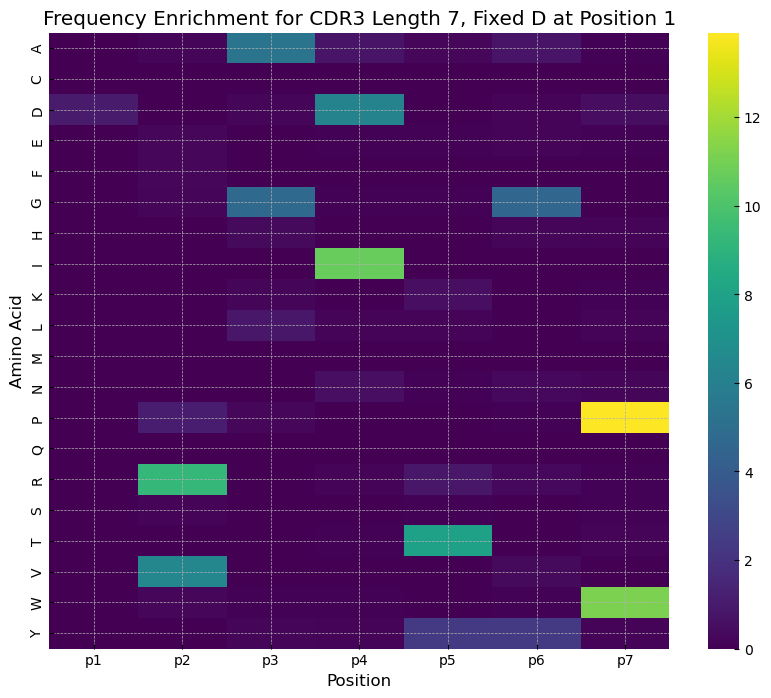

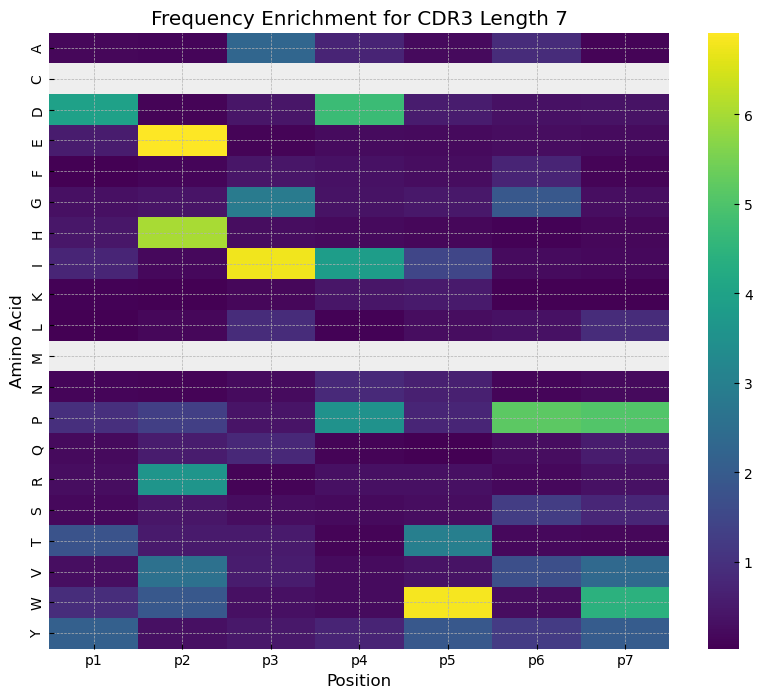

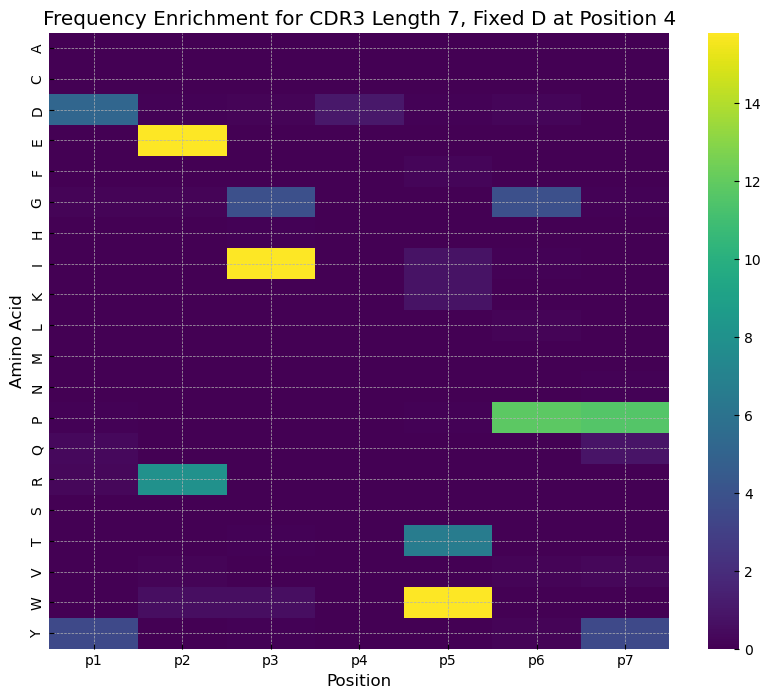

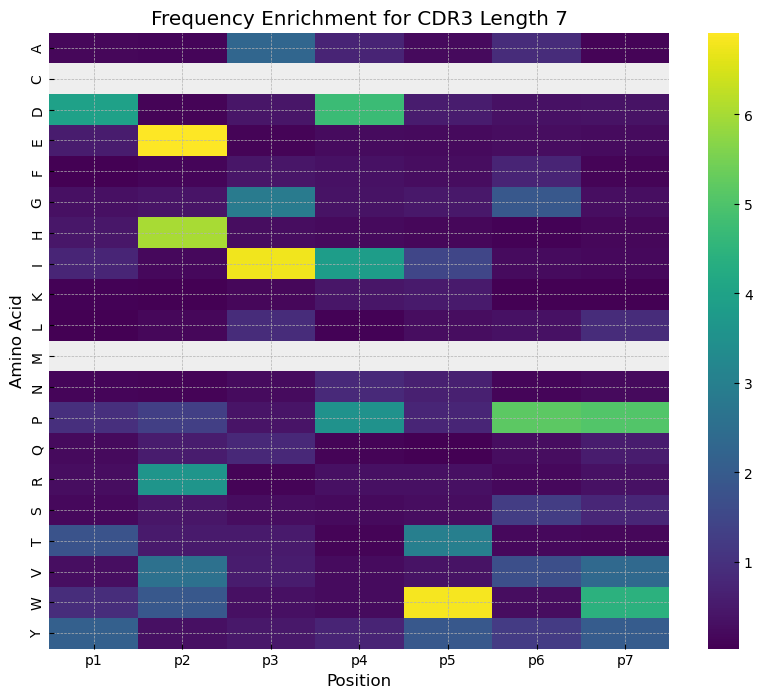

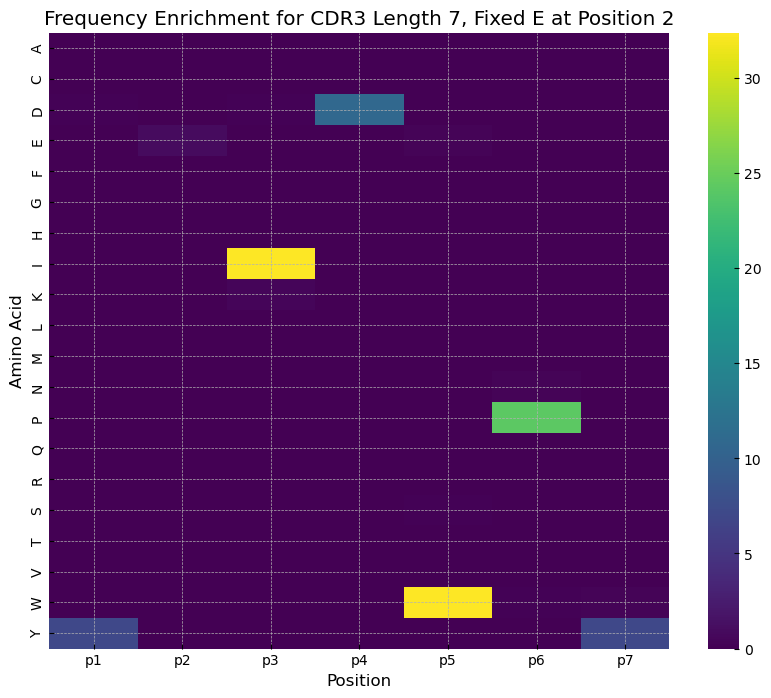

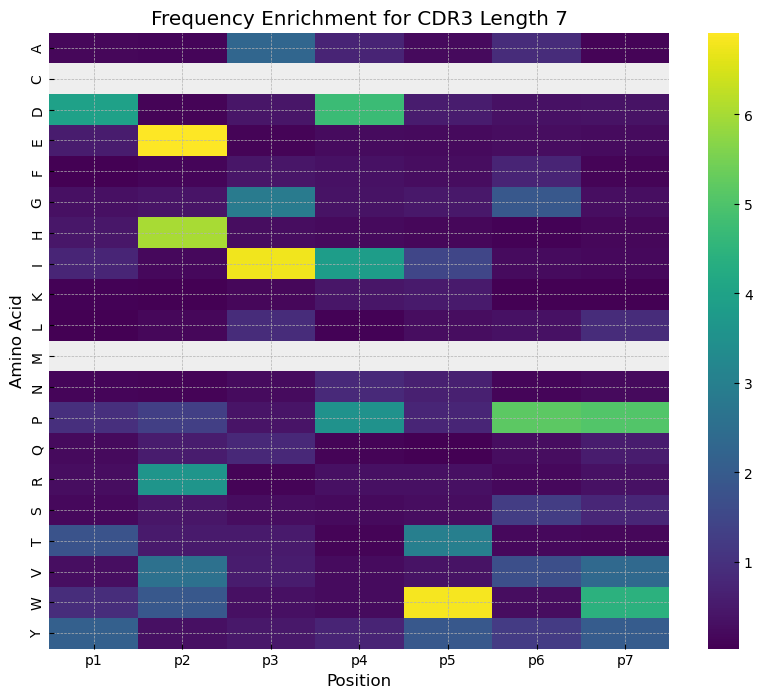

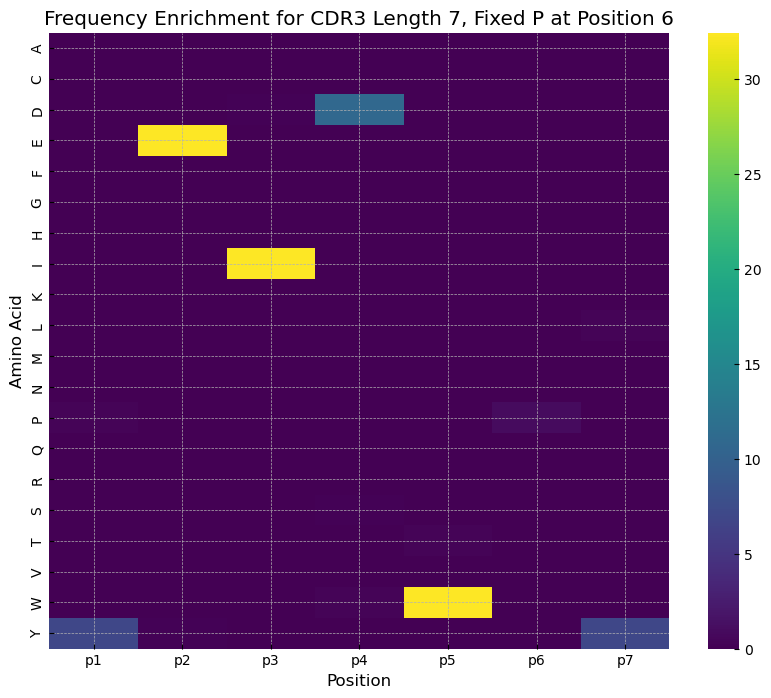

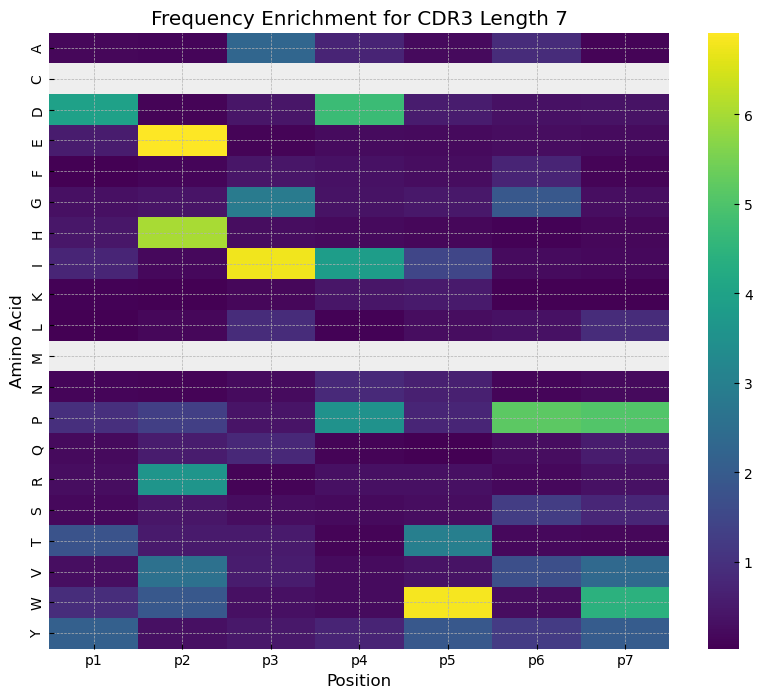

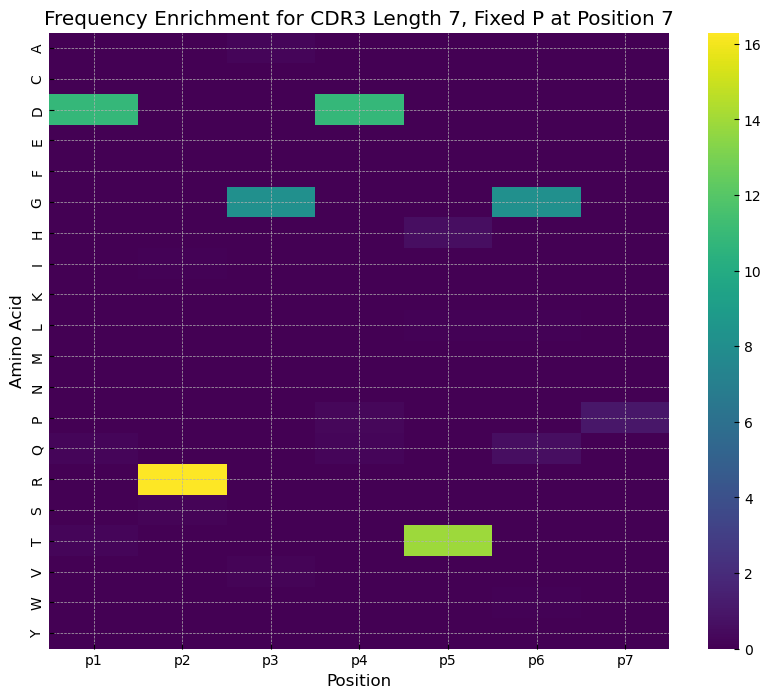

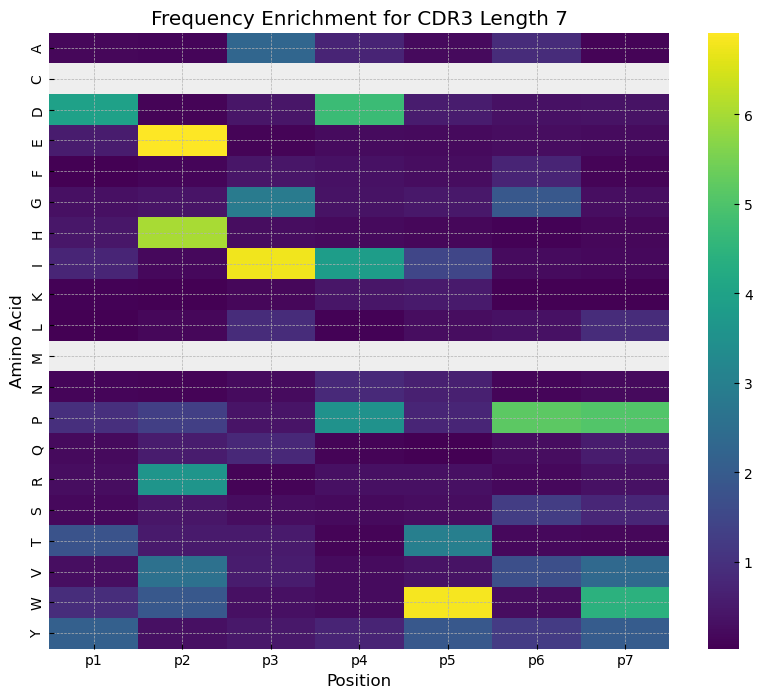

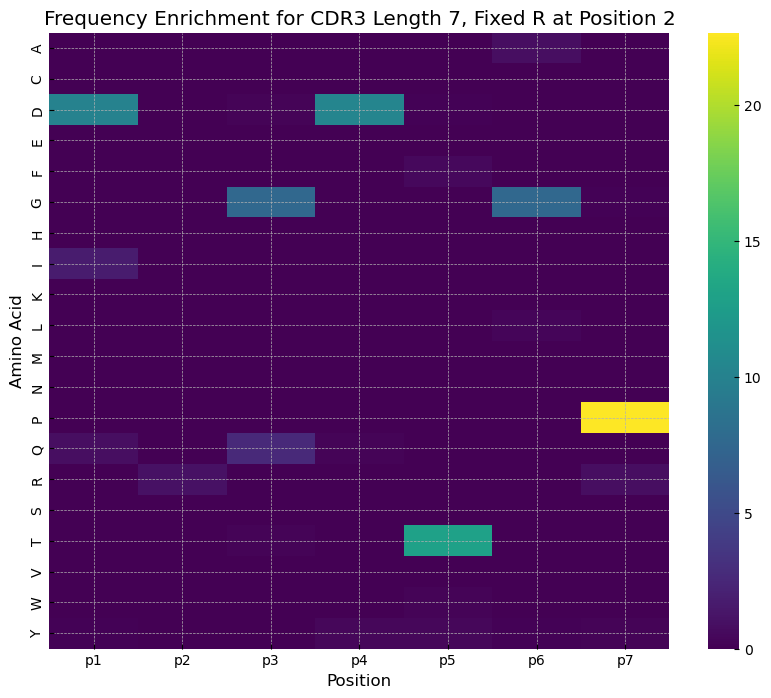

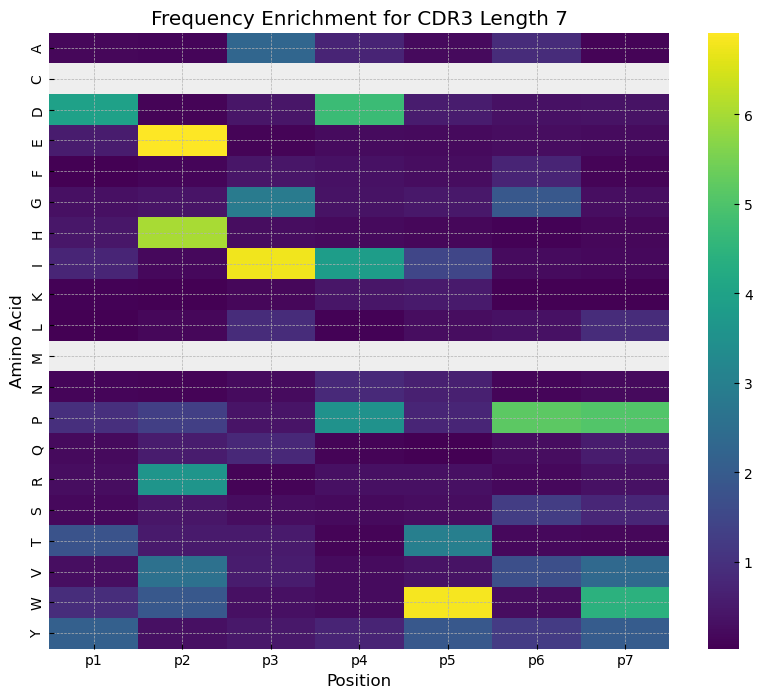

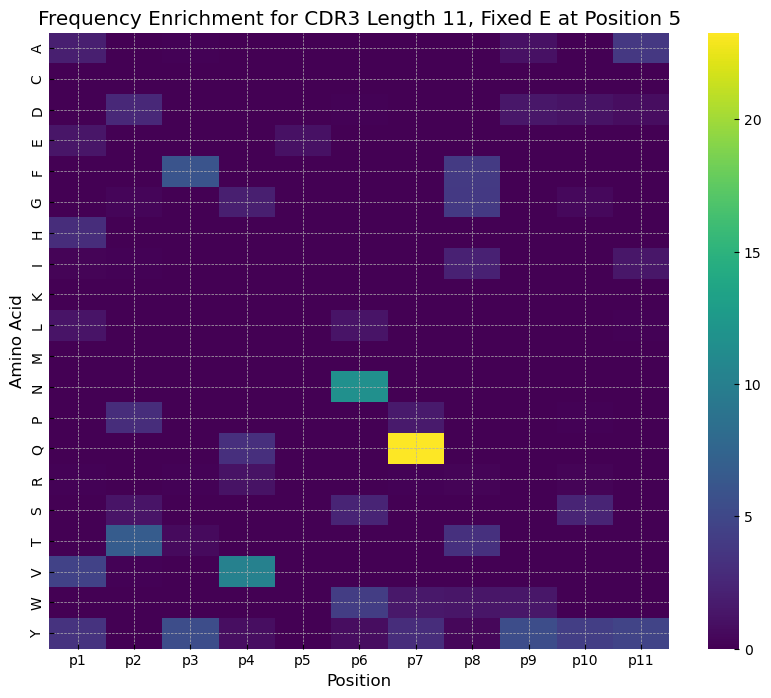

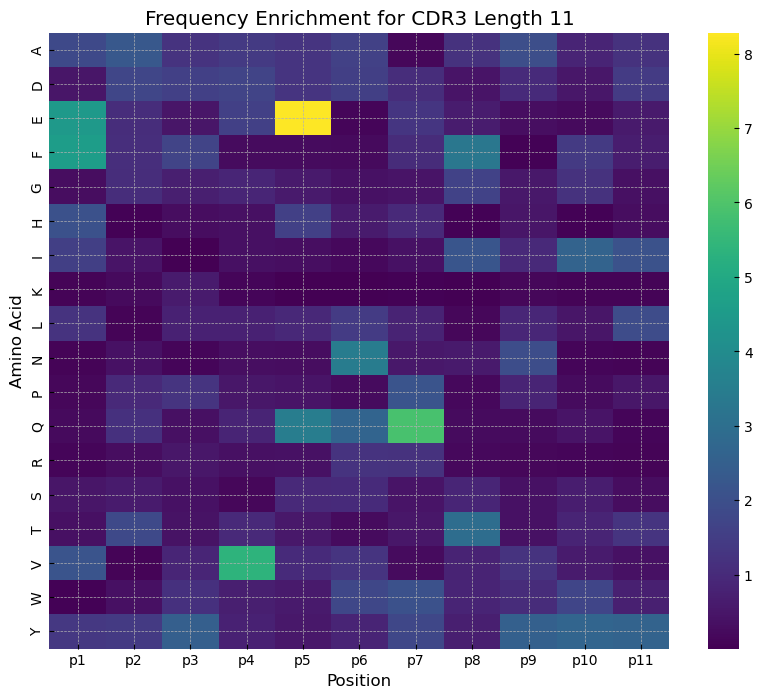

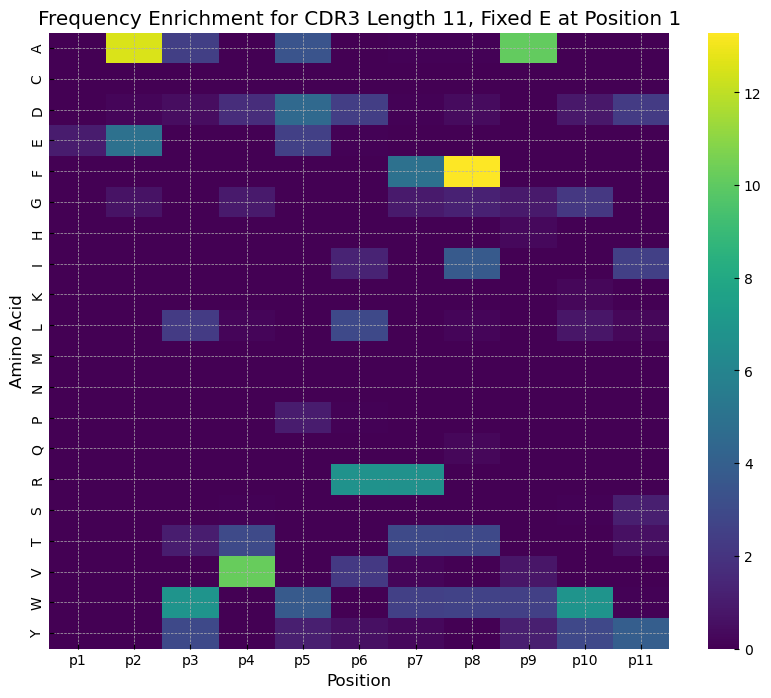

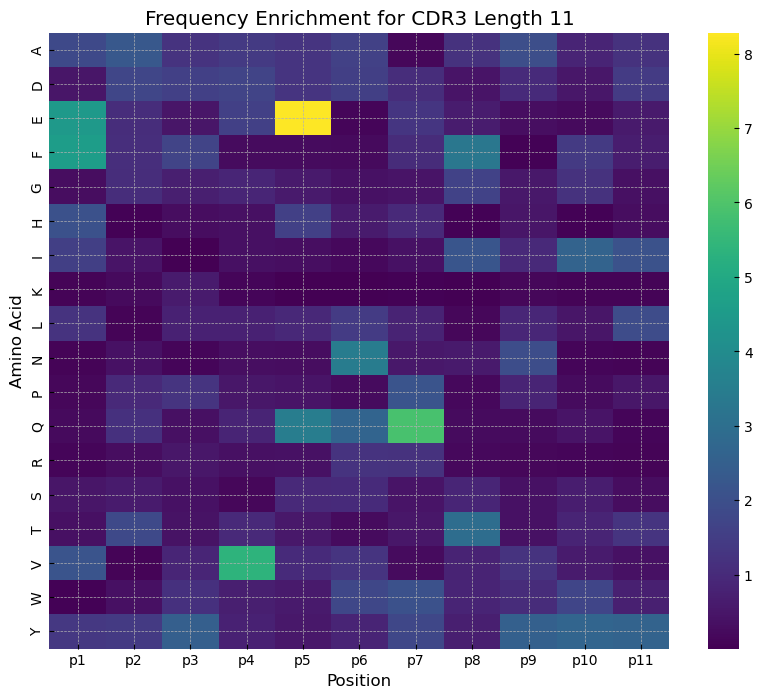

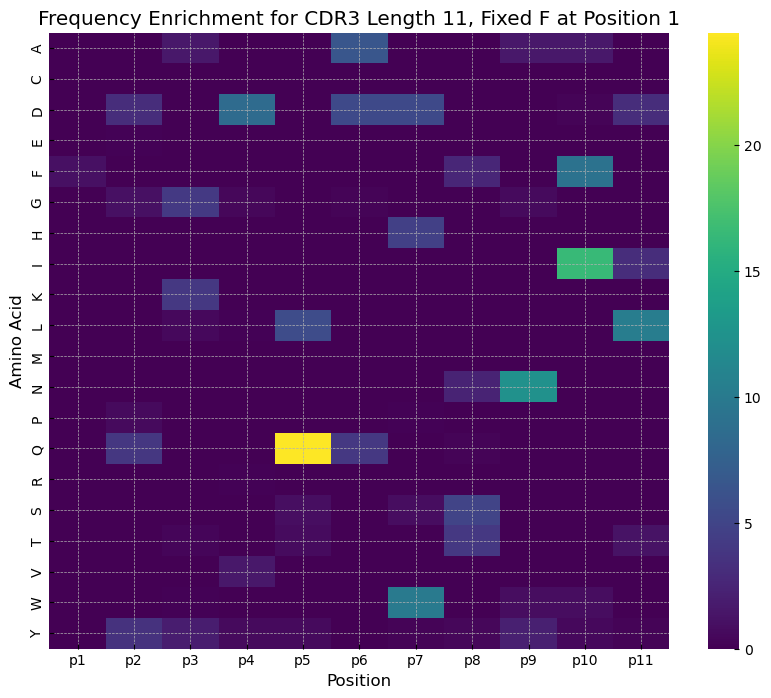

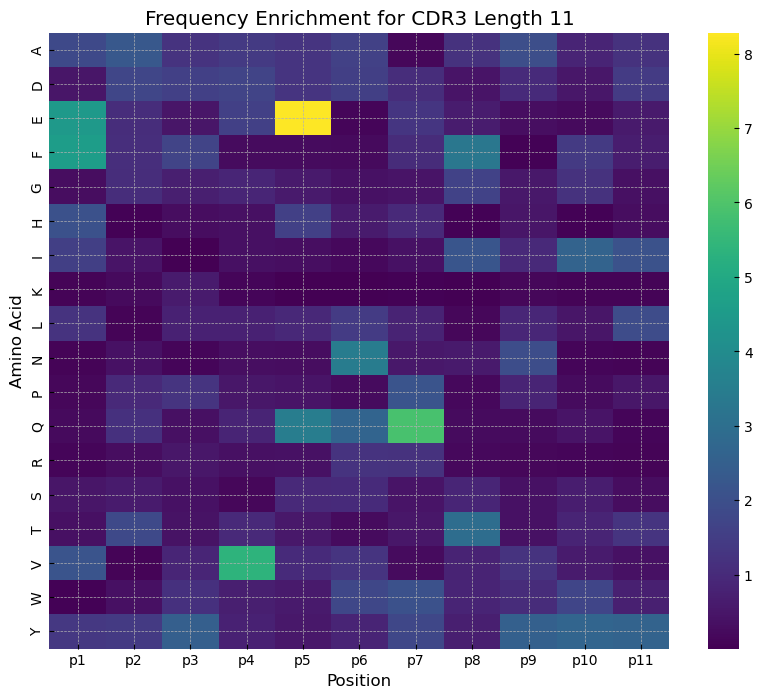

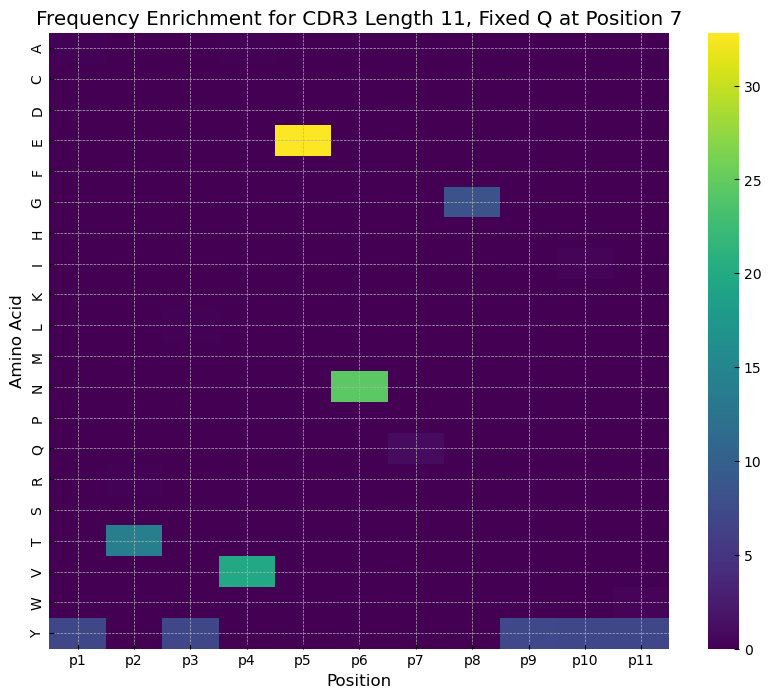

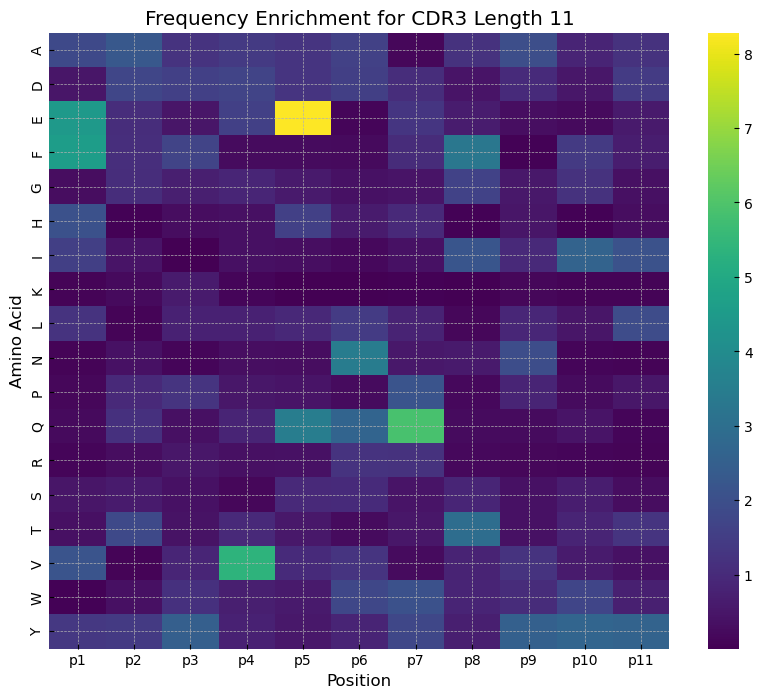

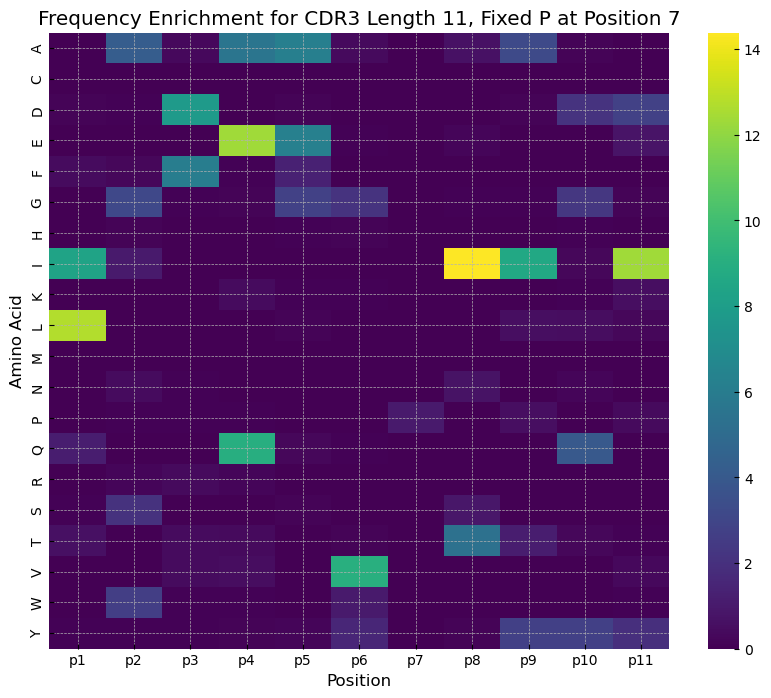

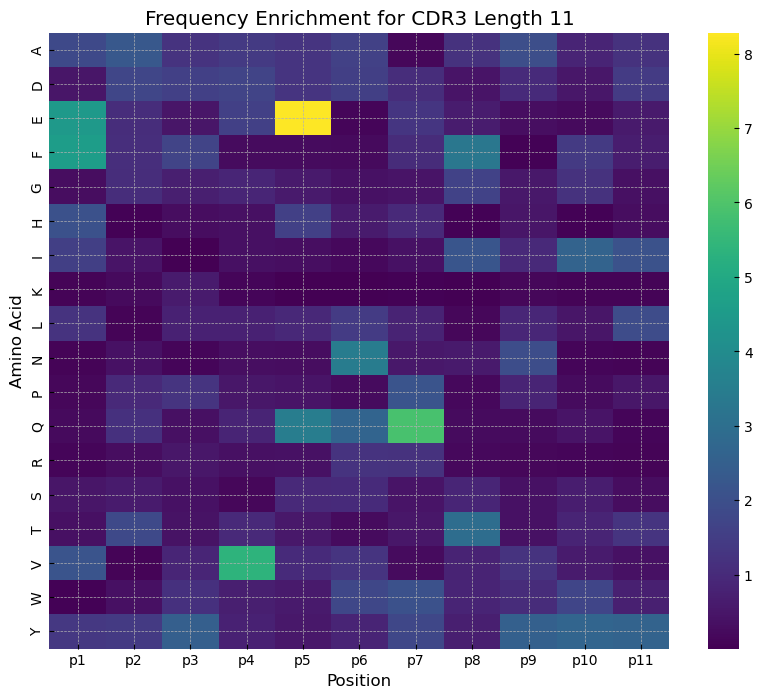

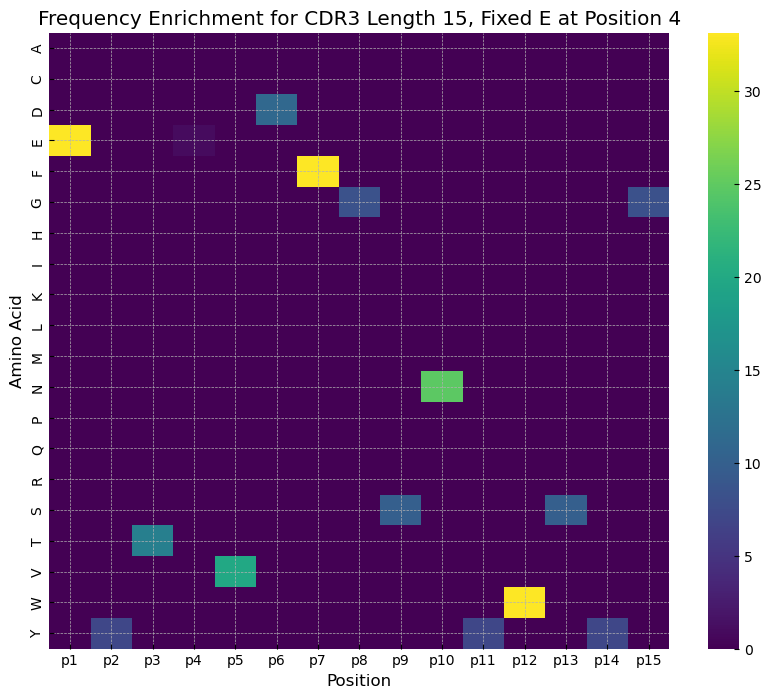

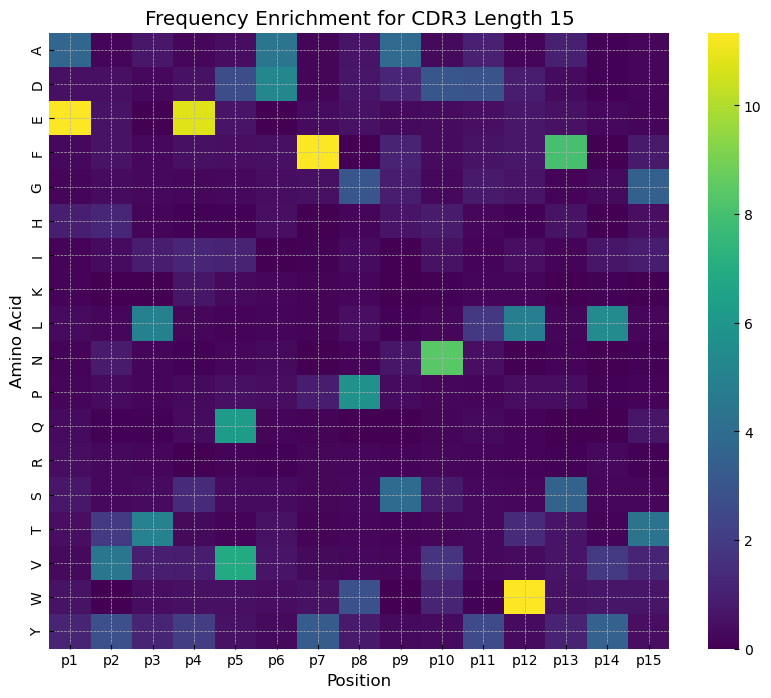

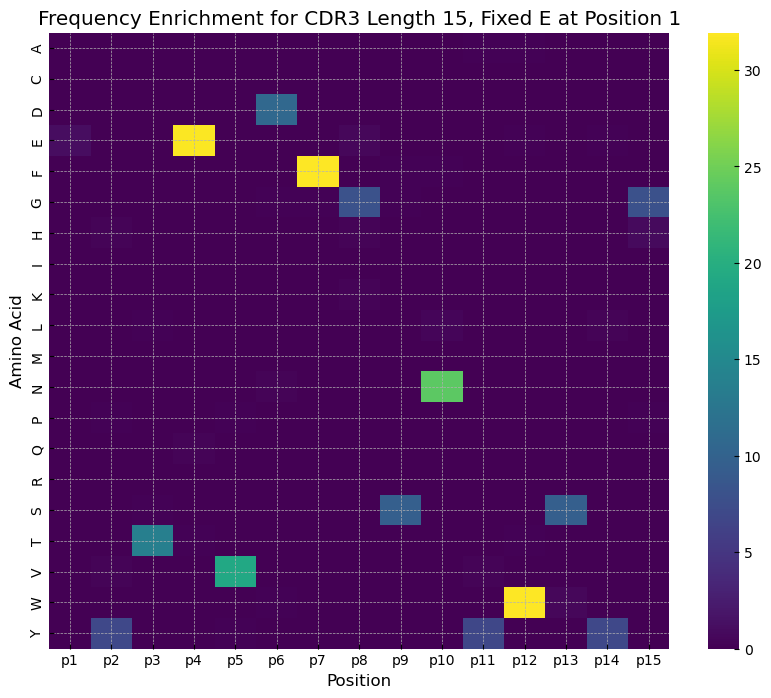

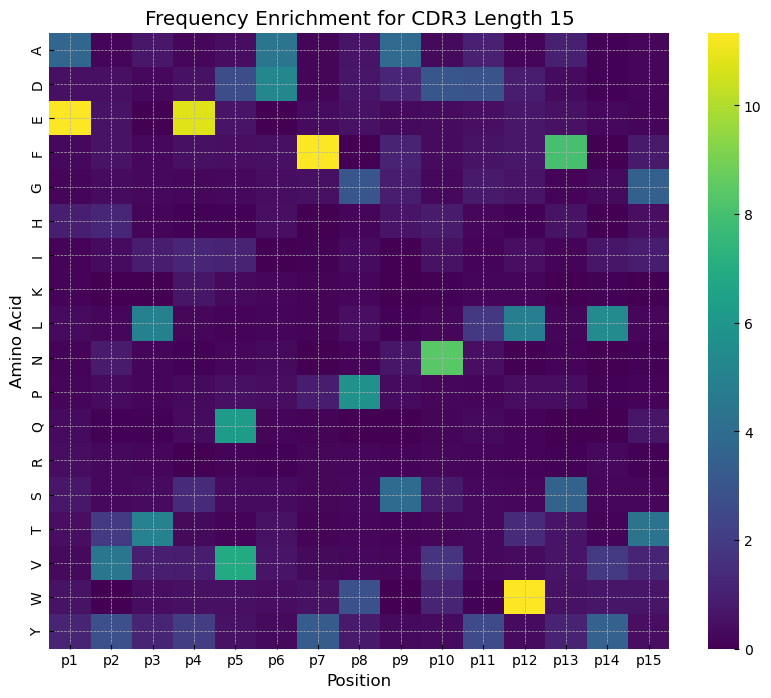

In [20]:
Fix_Heatmap ("D" , 1 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)
Fix_Heatmap ("D" , 4 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)
Fix_Heatmap ("E" , 2 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)
Fix_Heatmap ("P" , 6 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)
Fix_Heatmap ("P" , 7 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)
Fix_Heatmap ("R" , 2 , AminoAcides_Enrichment_Len7_Heatmap ,R4_length_7p ,Naive7,  7)

Fix_Heatmap ("E" , 5 , AminoAcides_Enrichment_Len11_Heatmap ,R4_length_11p ,Naive11,  11)
Fix_Heatmap ("E" , 1 , AminoAcides_Enrichment_Len11_Heatmap , R4_length_11p ,Naive11,  11)
Fix_Heatmap ("F" , 1 , AminoAcides_Enrichment_Len11_Heatmap ,R4_length_11p ,Naive11,  11)
Fix_Heatmap ("Q" , 7 ,  AminoAcides_Enrichment_Len11_Heatmap ,R4_length_11p ,Naive11,  11)
Fix_Heatmap ("P" , 7 ,  AminoAcides_Enrichment_Len11_Heatmap ,R4_length_11p ,Naive11,  11)

Fix_Heatmap ("E" , 4 , AminoAcides_Enrichment_Len15_Heatmap , R4_length_15p ,Naive15,  15)
Fix_Heatmap ("E" , 1 , AminoAcides_Enrichment_Len15_Heatmap , R4_length_15p ,Naive15,  15)

